In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [86]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [87]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [88]:
y_train = df_train['Survived']
x_train = df_train[['Survived', 'Sex', 'Age', 'Fare', 'Pclass', 'Embarked']] #Survived
x_test = df_test[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']]

In [89]:
def get_dummies(df, col, values):
    for val in values:
        new_col = 'Is_' + val
        df[new_col] = (df[col] == val).astype(int)
    del df[col]
    return df

In [90]:
x_train = get_dummies(x_train, 'Sex', ['female', 'male'])
x_test = get_dummies(x_test, 'Sex', ['female', 'male'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [91]:
x_train = get_dummies(x_train, 'Embarked', ['S', 'C', 'Q'])
x_test = get_dummies(x_test, 'Embarked', ['S', 'C', 'Q'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [92]:
x_train['Age'].fillna(x_train['Age'].mean(), inplace=True)
x_test['Age'].fillna(x_test['Age'].mean(), inplace=True)

x_train['Fare'].fillna(x_train['Fare'].mean(), inplace=True)
x_test['Fare'].fillna(x_test['Fare'].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## Relation target / Age

In [93]:
len(x_train['Age'].unique())

89

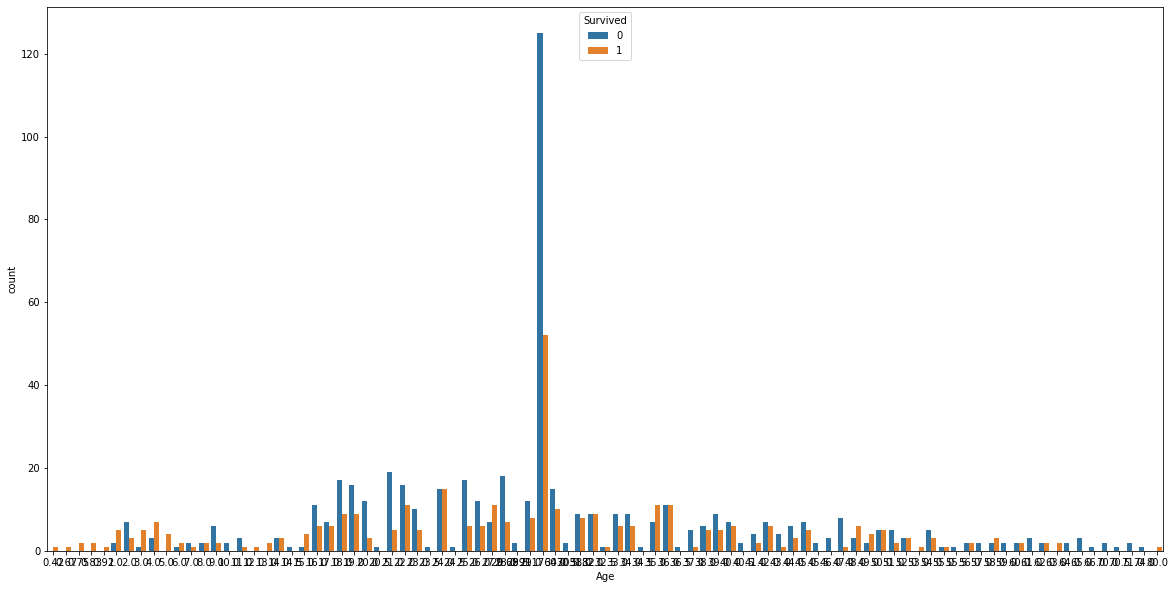

In [94]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue=y_train, data=x_train)

## Relation Target / Fare

In [95]:
x_train.keys()

Index(['Survived', 'Age', 'Fare', 'Pclass', 'Is_female', 'Is_male', 'Is_S',
       'Is_C', 'Is_Q'],
      dtype='object')

In [96]:
df_survived = x_train[x_train['Survived'] == 1 ]
df_died = x_train[x_train['Survived'] == 0 ]

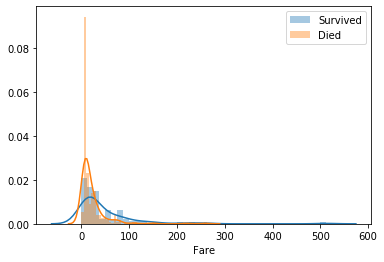

In [97]:
plt.figure()
sns.distplot(df_survived['Fare'], label="Survived")
sns.distplot(df_died['Fare'], label="Died")
plt.legend()

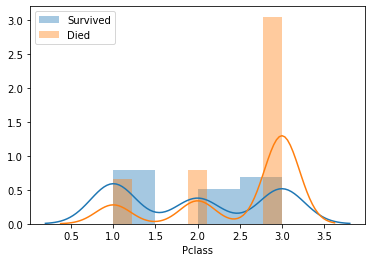

In [98]:
plt.figure()
sns.distplot(df_survived['Pclass'], label="Survived")
sns.distplot(df_died['Pclass'], label="Died")
plt.legend()

In [99]:
print(x_train['Fare'].max())
print(x_train['Fare'].min())
print(x_train['Fare'].mean())

512.3292
0.0
32.204207968574636


## Relation Fare / Pclass

## Relation Target / variable discète

In [42]:
df_train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

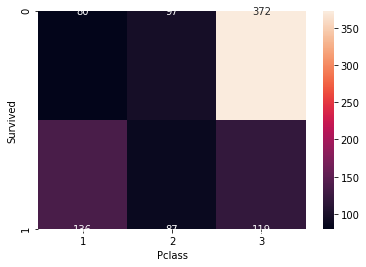

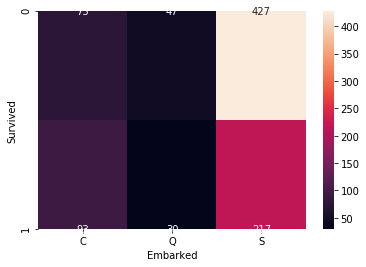

In [47]:
discrete_variables = ['Pclass', 'Embarked']

for col in discrete_variables:
    plt.figure()
    sns.heatmap(pd.crosstab(df_train['Survived'], df_train[col]), annot=True, fmt='d')

## Relation Embarked S / Fare

In [72]:
tmp = df_train[['Fare', 'Embarked']]

In [66]:
tmp

Fare Embarked
0     7.2500        S
1    71.2833        C
2     7.9250        S
3    53.1000        S
4     8.0500        S
..       ...      ...
886  13.0000        S
887  30.0000        S
888  23.4500        S
889  30.0000        C
890   7.7500        Q

[891 rows x 2 columns]

In [68]:
index = tmp.index
condition = tmp['Embarked'] != 'S'
indices = index[condition]

In [69]:
tmp.drop(indices, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
tmp['Fare'].mean()

32.204207968574636

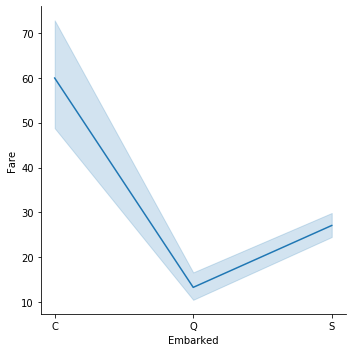

In [73]:
sns.relplot(x='Embarked', y='Fare', kind='line', data=tmp)

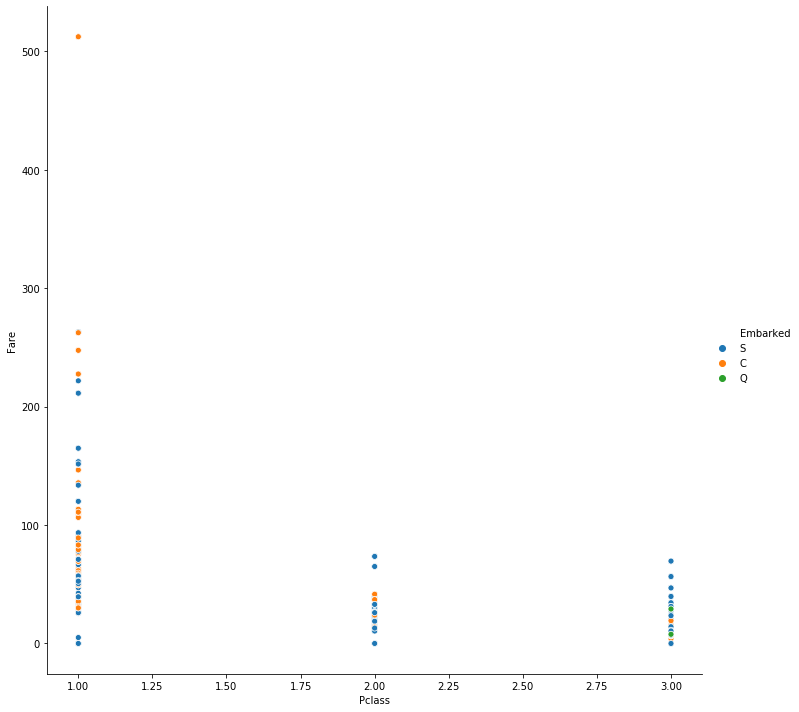

In [83]:
sns.relplot(x="Pclass", y="Fare", hue="Embarked", height=10, data=df_train)

In [84]:
x_train.head()

Age     Fare  Pclass  Is_femeale  Is_male  Is_S  Is_C  Is_Q
0  22.0   7.2500       3           0        1     1     0     0
1  38.0  71.2833       1           0        0     0     1     0
2  26.0   7.9250       3           0        0     1     0     0
3  35.0  53.1000       1           0        0     1     0     0
4  35.0   8.0500       3           0        1     1     0     0

In [32]:
del x_train['Survived']

## Modèle

In [123]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [108]:
x2_train.head()

Age  Pclass  Is_female
0  22.0       3          0
1  38.0       1          1
2  26.0       3          1
3  35.0       1          1
4  35.0       3          0

In [109]:
x2_train = x_train[['Age', 'Pclass', 'Is_female', 'Is_male']]
model2 = SVC(random_state=0)
model2.fit(x2_train, y_train)

SVC(random_state=0)

In [124]:
y_train_pred2 = model2.predict(x2_train)
y_train_pred2 = pd.DataFrame(y_train_pred2)
accuracy_score(y_train_pred2, y_train)

0.7059483726150393

In [142]:
x2_train = x_train[['Age', 'Pclass', 'Is_female', 'Is_male']]
linearSVC = LinearSVC(random_state=0, C=4, max_iter=1000000)
linearSVC.fit(x2_train, y_train)

LinearSVC(C=4, max_iter=1000000, random_state=0)

In [143]:
y_pred3 = linearSVC.predict(x2_train)
y_pred3 = pd.DataFrame(y_pred3)
accuracy_score(y_pred3, y_train)

0.792368125701459

In [144]:
x_test = x_test[['Age', 'Pclass', 'Is_female', 'Is_male']]
y_test_pred = linearSVC.predict(x_test)
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred['PassengerId'] = df_test['PassengerId']
y_test_pred.columns = ['Survived', 'PassengerId']
y_test_pred = y_test_pred.reindex(sorted(y_test_pred.columns), axis = 1)
y_test_pred.to_csv('pred_it3.csv', index=False)

In [122]:
x_train.keys()

Index(['Age', 'Fare', 'Pclass', 'Is_female', 'Is_male', 'Is_S', 'Is_C',
       'Is_Q'],
      dtype='object')

In [117]:
# del x_train['Survived']

In [118]:
model = SVC(random_state=0)

In [119]:
model.fit(x_train, y_train)

SVC(random_state=0)

In [120]:
y_train_pred = model.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [121]:
accuracy_score(y_train_pred, y_train)

0.6835016835016835